In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [62]:
y_test

array([3, 8, 8, 0, 6], dtype=uint8)

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train=y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


In [16]:
classes[9]

'truck'

In [17]:
def plot_sample(X,y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

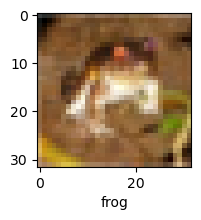

In [18]:
plot_sample(X_train, y_train, 0)

In [19]:
X_train = X_train/255
X_test = X_test/255

In [20]:
ann = models.Sequential([
  layers.Flatten(input_shape=(32,32,3)),
  layers.Dense(3000, activation='relu'),
  layers.Dense(1000, activation='relu'),
  layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

2023-01-06 12:11:14.372721: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-06 12:11:14.372850: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/5


2023-01-06 12:11:15.609677: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-06 12:11:15.771563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 19s 12ms/step - loss: 1.8167 - accuracy: 0.3525
Epoch 2/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6265 - accuracy: 0.4253
Epoch 3/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5445 - accuracy: 0.4553
Epoch 4/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4870 - accuracy: 0.4756
Epoch 5/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4368 - accuracy: 0.4944


In [21]:
ann.evaluate(X_test, y_test)

  6/313 [..............................] - ETA: 3s - loss: 1.4724 - accuracy: 0.4792  

2023-01-06 14:33:47.634490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 8ms/step - loss: 1.5019 - accuracy: 0.4521


[1.501939296722412, 0.45210000872612]

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test) 
y_pred

 45/313 [===>..........................] - ETA: 0s

2023-01-06 14:38:13.326728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step


array([[0.30593163, 0.48448205, 0.6556892 , ..., 0.09305707, 0.5450951 ,
        0.14388074],
       [0.6674633 , 0.9097571 , 0.24128354, ..., 0.11276475, 0.8919127 ,
        0.99387467],
       [0.9274735 , 0.9063278 , 0.26648045, ..., 0.20823556, 0.9558081 ,
        0.9519341 ],
       ...,
       [0.06144264, 0.04341778, 0.7893643 , ..., 0.59300756, 0.18743353,
        0.25327206],
       [0.24877083, 0.16444327, 0.65643346, ..., 0.65855485, 0.07401178,
        0.3660871 ],
       [0.49079102, 0.17034324, 0.63952917, ..., 0.91625786, 0.14693572,
        0.49373668]], dtype=float32)

In [27]:
# the max value is located in the index number 3
y_pred[0]


array([0.30593163, 0.48448205, 0.6556892 , 0.86297166, 0.37338296,
       0.72499037, 0.7521477 , 0.09305707, 0.5450951 , 0.14388074],
      dtype=float32)

In [25]:
y_pred_classes = [np.argmax(element) for element in y_pred]

y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [26]:
y_pred_classes

[3,
 9,
 8,
 8,
 4,
 6,
 3,
 6,
 3,
 1,
 8,
 9,
 7,
 7,
 9,
 8,
 5,
 9,
 8,
 6,
 9,
 0,
 0,
 9,
 4,
 6,
 6,
 0,
 9,
 6,
 6,
 4,
 7,
 3,
 9,
 1,
 6,
 9,
 9,
 5,
 7,
 6,
 9,
 6,
 9,
 9,
 3,
 9,
 4,
 6,
 9,
 7,
 6,
 3,
 8,
 8,
 7,
 6,
 9,
 2,
 7,
 3,
 7,
 9,
 6,
 2,
 9,
 2,
 3,
 9,
 2,
 7,
 8,
 8,
 9,
 2,
 9,
 3,
 3,
 9,
 8,
 1,
 1,
 9,
 2,
 9,
 9,
 9,
 8,
 9,
 9,
 6,
 8,
 6,
 7,
 3,
 4,
 0,
 2,
 9,
 7,
 7,
 6,
 3,
 1,
 9,
 5,
 6,
 8,
 7,
 6,
 0,
 6,
 2,
 9,
 9,
 0,
 9,
 2,
 7,
 9,
 4,
 9,
 2,
 0,
 3,
 9,
 5,
 3,
 9,
 4,
 9,
 9,
 9,
 1,
 3,
 9,
 7,
 6,
 8,
 2,
 1,
 9,
 5,
 9,
 7,
 6,
 5,
 7,
 9,
 9,
 9,
 8,
 9,
 0,
 5,
 2,
 9,
 3,
 9,
 2,
 7,
 3,
 6,
 9,
 9,
 8,
 6,
 9,
 9,
 9,
 7,
 9,
 8,
 9,
 9,
 8,
 6,
 3,
 9,
 9,
 7,
 6,
 2,
 7,
 8,
 6,
 6,
 7,
 0,
 6,
 9,
 3,
 9,
 7,
 4,
 8,
 2,
 7,
 3,
 3,
 9,
 0,
 7,
 1,
 6,
 8,
 4,
 7,
 9,
 3,
 9,
 9,
 9,
 9,
 2,
 8,
 9,
 0,
 7,
 7,
 3,
 9,
 6,
 9,
 9,
 9,
 2,
 3,
 2,
 5,
 9,
 3,
 1,
 9,
 0,
 4,
 0,
 6,
 3,
 1,
 9,
 9,
 9,
 0,
 1,
 7,
 0,
 5,
 1,


In [28]:
print('Classification Report: \n', classification_report(y_test, y_pred_classes))


Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.50      0.55      1000
           1       0.70      0.34      0.46      1000
           2       0.40      0.33      0.36      1000
           3       0.36      0.32      0.34      1000
           4       0.57      0.22      0.32      1000
           5       0.48      0.25      0.33      1000
           6       0.45      0.65      0.53      1000
           7       0.44      0.57      0.50      1000
           8       0.71      0.49      0.58      1000
           9       0.32      0.83      0.46      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.44     10000
weighted avg       0.50      0.45      0.44     10000



In [32]:
cnn = models.Sequential([
  #CNN
  layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
  layers.MaxPooling2D((2,2)),

  layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  layers.MaxPooling2D((2,2)),

  #Dense
  layers.Flatten(),
  layers.Dense(64, activation ='relu'),
  layers.Dense(10, activation='softmax')
])

When I use softmax Fuction it normalize the probability

class 1 value: 0.45
class 2 value: 0.68

output for softmax = 0.45 / (0.45+0.68)

model.compile(optimizer = 'adam')

In [39]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [40]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10


2023-01-06 22:44:10.004015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 28s 17ms/step - loss: 1.4568 - accuracy: 0.4788
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1166 - accuracy: 0.6086
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0032 - accuracy: 0.6513
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9248 - accuracy: 0.6778
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8675 - accuracy: 0.6998
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8142 - accuracy: 0.7183
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7675 - accuracy: 0.7328
Epoch 8/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7278 - accuracy: 0.7473
Epoch 9/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6850 - accuracy: 0.7625
Epoch 10/10
1563/1563 [==============================] - 23s 15ms/step - lo

In [41]:
cnn.evaluate(X_test, y_test)

  1/313 [..............................] - ETA: 1:13 - loss: 0.5725 - accuracy: 0.8125

2023-01-06 22:49:20.428285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 12ms/step - loss: 0.9680 - accuracy: 0.6779


[0.9680052995681763, 0.6779000163078308]

In [50]:
X_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [61]:
y_test

array([3, 8, 8, 0, 6], dtype=uint8)

In [49]:
y_test=y_test.reshape(-1, )
y_test

array([3, 8, 8, 0, 6], dtype=uint8)

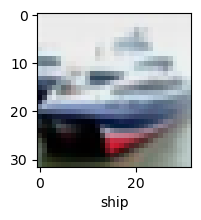

In [47]:
plot_sample(X_test, y_test, 1)

In [51]:
y_pred = cnn.predict(X_test)
y_pred[:5]

 27/313 [=>............................] - ETA: 1s

2023-01-08 22:53:47.186473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step


array([[4.2545475e-04, 2.1988288e-05, 3.4632417e-04, 9.1945571e-01,
        4.5542701e-04, 4.0764704e-02, 1.9883359e-02, 9.5571331e-06,
        1.8467797e-02, 1.6976148e-04],
       [3.3097619e-03, 2.1626769e-01, 2.2712763e-06, 1.6464235e-05,
        5.3234390e-07, 4.5559409e-07, 3.6613039e-07, 5.7807729e-06,
        7.5669152e-01, 2.3705110e-02],
       [7.4972309e-02, 2.1211009e-01, 4.4845776e-03, 4.1276354e-02,
        3.9547752e-03, 1.4061621e-02, 3.2922123e-03, 9.4190761e-03,
        5.0565493e-01, 1.3077402e-01],
       [7.0187569e-01, 5.4878271e-03, 3.6701836e-02, 1.8413382e-02,
        6.5645255e-02, 1.6297773e-03, 8.1380771e-04, 5.5187714e-04,
        1.6813900e-01, 7.4160646e-04],
       [3.2294352e-06, 1.5621008e-06, 2.8692291e-03, 1.2722196e-01,
        1.5435363e-01, 2.2087554e-03, 7.1147346e-01, 1.1123455e-05,
        1.8524593e-03, 4.5134248e-06]], dtype=float32)

In [66]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [67]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

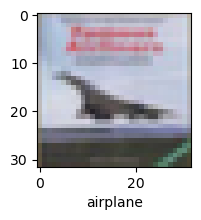

In [68]:
plot_sample(X_test, y_test, 3)

In [69]:
classes[y_classes[1]]

'ship'

In [70]:
y_classes

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 7,
 7,
 9,
 6,
 5,
 7,
 8,
 6,
 7,
 0,
 2,
 9,
 4,
 3,
 4,
 2,
 9,
 6,
 6,
 5,
 4,
 5,
 9,
 5,
 7,
 9,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 3,
 7,
 7,
 4,
 9,
 8,
 6,
 6,
 8,
 8,
 7,
 5,
 5,
 5,
 7,
 5,
 5,
 2,
 6,
 6,
 1,
 0,
 5,
 3,
 2,
 6,
 8,
 8,
 0,
 2,
 7,
 8,
 7,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 2,
 8,
 9,
 9,
 0,
 4,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 3,
 1,
 1,
 3,
 6,
 3,
 5,
 7,
 0,
 6,
 2,
 1,
 5,
 0,
 4,
 6,
 5,
 8,
 3,
 1,
 2,
 0,
 0,
 2,
 3,
 5,
 0,
 4,
 1,
 9,
 9,
 1,
 5,
 9,
 7,
 2,
 8,
 3,
 5,
 6,
 5,
 1,
 7,
 6,
 6,
 5,
 3,
 8,
 9,
 6,
 0,
 6,
 5,
 3,
 9,
 3,
 4,
 0,
 1,
 6,
 6,
 0,
 7,
 8,
 6,
 9,
 0,
 9,
 6,
 9,
 8,
 9,
 9,
 3,
 7,
 5,
 9,
 8,
 5,
 2,
 4,
 5,
 8,
 6,
 3,
 5,
 8,
 5,
 3,
 7,
 1,
 7,
 6,
 8,
 8,
 7,
 8,
 5,
 9,
 8,
 7,
 1,
 3,
 8,
 5,
 7,
 9,
 6,
 0,
 5,
 9,
 8,
 2,
 4,
 9,
 8,
 7,
 4,
 3,
 9,
 5,
 4,
 9,
 3,
 2,
 3,
 6,
 3,
 1,
 5,
 1,
 8,
 0,
 4,
 7,
 5,
 2,
 1,
 1,
 1,
 9,
 0,
 6,
 1,
 8,
 2,
 2,


In [71]:
print('Classification Report: \n', classification_report(y_test, y_classes))

ValueError: Found input variables with inconsistent numbers of samples: [5, 10000]